In [1]:
import os
# Change the working directory to the project's root
project_root = os.path.dirname(os.getcwd())
os.chdir(project_root)

# CLS interpolation

### Loading data

In [2]:
import pandas as pd
from src.utils import *
from src.dates import *
# Load the data
excel = pd.read_csv('data/CLS_DS.csv')

# Extract the data for 2021, 2022, and 2023
cls_2021 = excel[['Plot','D0','D1','D2', 'D3','D4','D5']][:40]
cls_2021.set_index('Plot', inplace=True)
cls_2021.columns = d_day_2021

cls_2022 = excel[['Plot','D0','D1','D2', 'D3','D4','D5']][40:80]
cls_2022.set_index('Plot', inplace=True)
cls_2022.columns = d_day_2022

cls_2023 = excel[['Plot','D0','D1','D2', 'D3','D4','D5','D6']][80:]
cls_2023.set_index('Plot', inplace=True)
cls_2023.columns = d_day_2023

# Interpolate the data
cls_interp_2021 = interpolate_dataframe(cls_2021, f_day_2021, method='quadratic')
cls_interp_2022 = interpolate_dataframe(cls_2022, f_day_2022, method='quadratic')
cls_interp_2023 = interpolate_dataframe(cls_2023, f_day_2023, method='quadratic')

### Visualisation

#### 2021

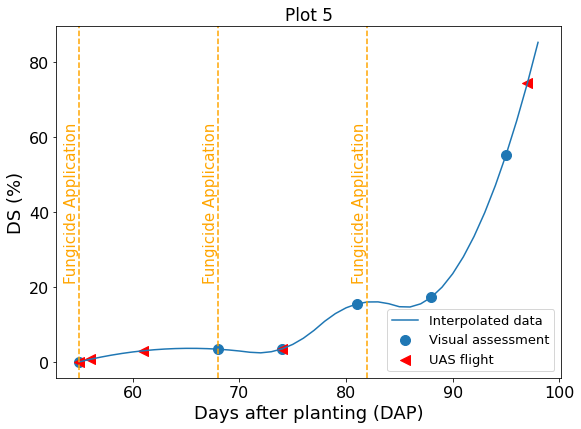

In [3]:
import matplotlib.pyplot as plt

plt_num = 5  ## Plot number to plot
f_day =f_day_2021
cls = cls_2021
cls_interpolated = interpolate_dataframe(cls, range(55, 99), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [55, 68, 82]  # fungicide application dates same for both 2021 and 2022
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('figures/cls_interpolation_21.png')

#### 2022

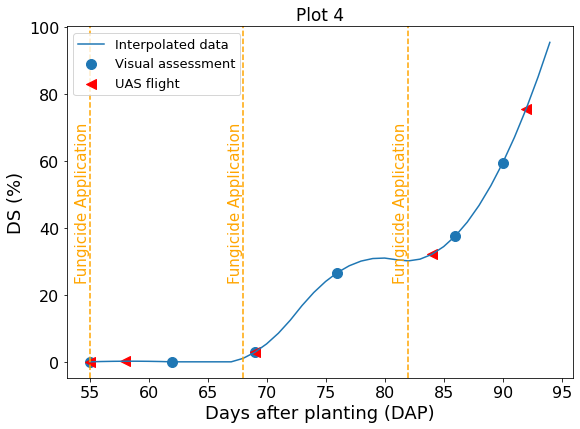

In [4]:
plt_num = 4
f_day =f_day_2022
cls = cls_2022
cls_interpolated = interpolate_dataframe(cls, range(55, 95), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [55, 68, 82]  # fungicide application dates same for both 2021 and 2022
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('figures/cls_interpolation_22.png')

#### 2023 

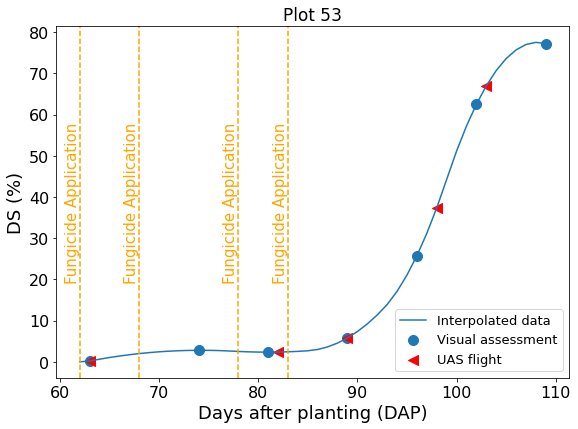

In [5]:
plt_num = 53 ## Plot number to plot
f_day =f_day_2023
cls = cls_2023
cls_interpolated = interpolate_dataframe(cls, range(62, 110), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [62, 68, 78, 83]  
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('figures/cls_interpolation_23.png')

# Study plot and feature visualisation

## Loading data

In [6]:
import pickle
import pandas as pd
from src.misc import remove_columns_ending_with_0

zipped_im21_22 = pickle.load(open('data/ziped_21_22.pkl', 'rb'))
zipped_im23 = pickle.load(open('data/ziped_23.pkl', 'rb'))
zipped_im = {**zipped_im21_22, **zipped_im23}

prep_dir = 'data/preprocessed_data/'

#For wavelength combinations
wave_comb21_22 = np.array([475,560,668,717,840])
wave_comb23 = np.array([560, 650, 730, 860])

#### loading vegetation masked images
zipped_veg_im21_22 = pickle.load(open(prep_dir + 'veg_im21_22.pkl', 'rb'))
zipped_veg_im23 = pickle.load(open(prep_dir + 'veg_im23.pkl', 'rb'))
zipped_veg_im = {**zipped_veg_im21_22, **zipped_veg_im23}

Data_21_22=pd.read_csv(prep_dir + 'feat_21_22.csv', header=0)
Data23 = pd.read_csv(prep_dir + 'feat_23.csv', header=0)
########################################################################

##### combining 21 and 23 data
Data_21_22 = remove_columns_ending_with_0(Data_21_22)   # removes blue features
Data21 = Data_21_22.iloc[:200]
Data22 = Data_21_22.iloc[200:]
Data = pd.concat([Data21, Data22, Data23])

## Visualisation

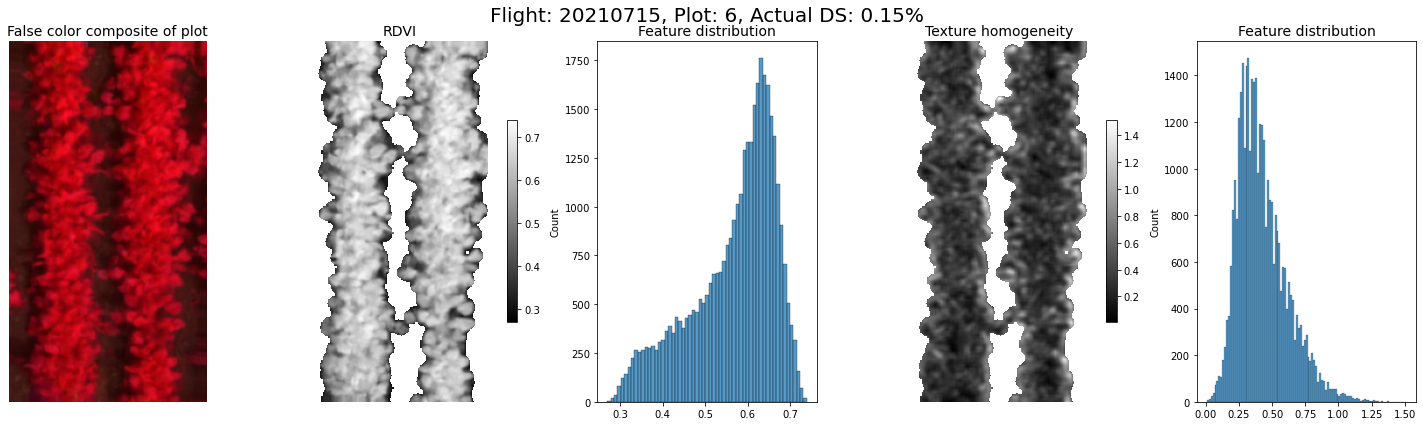

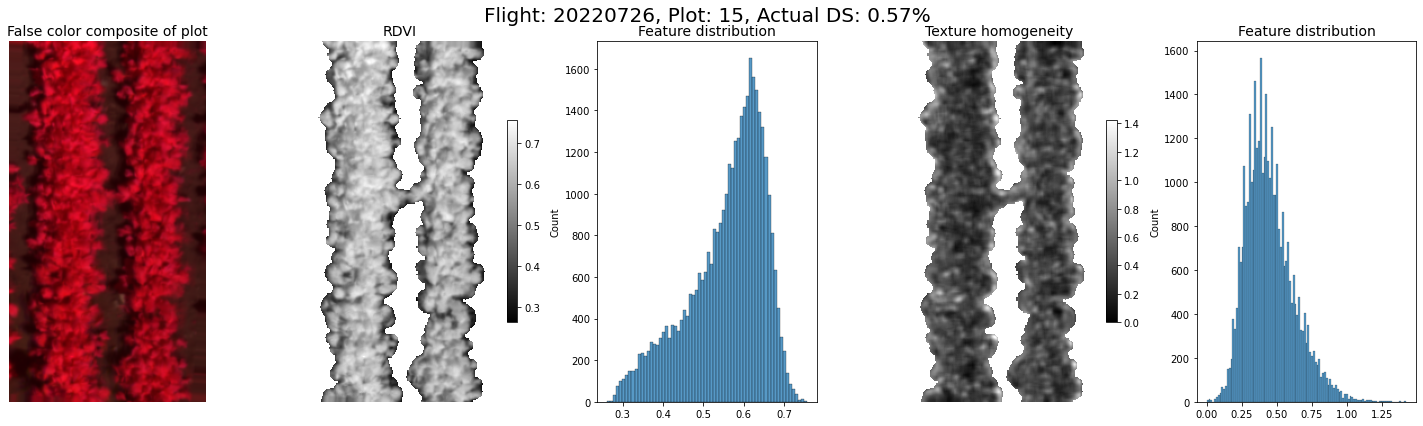

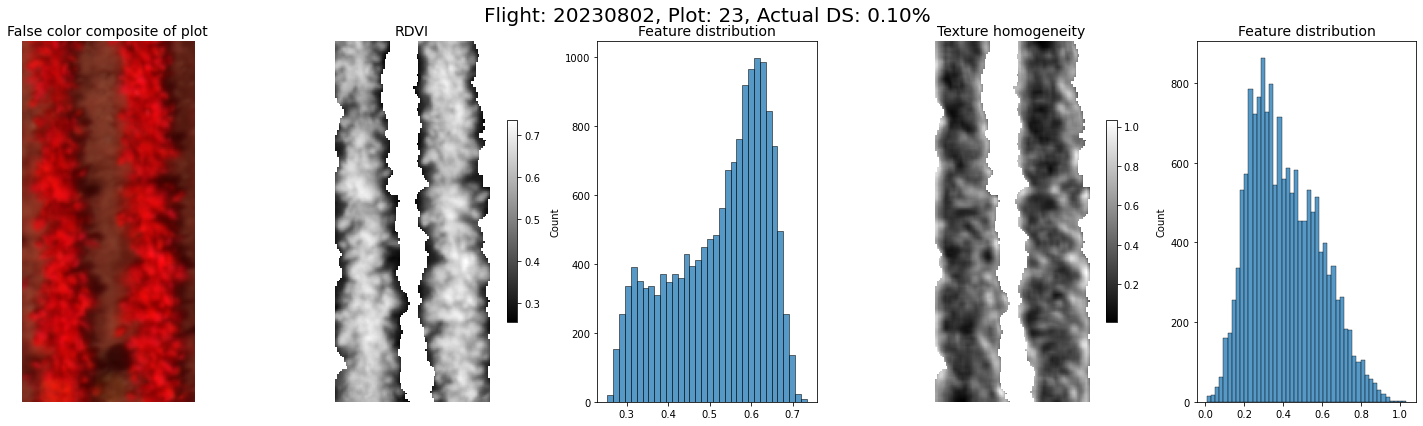

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from src.feature_extraction import *

def plt_img_dist(img_dict, veg_img_dict,Data,fl_plt_df):
    
    num_im = len(fl_plt_df)
    #fig, axes = plt.subplots(num_im, 3, figsize=(4*3,6*num_im))
    for flight, plot in fl_plt_df.values:
        fig, axes = plt.subplots(1, 5, figsize=(4*5,6*1))      # draw new figures each time
        ds = Data.loc[(Data['Flight'] == flight) & (Data['Plot'] ==plot), 'CLS_score'].item()
        fig.suptitle(f'Flight: {flight}, Plot: {plot}, Actual DS: {ds*100:.2f}%',fontsize=20)
        
        # Define the band combination for the false color composite
        if str(flight).startswith('2023'):
            band_comb = [3,1,0]
            wave_comb = wave_comb23
            band_num = 3
        else:
            band_comb = [4,2,1]
            wave_comb = wave_comb21_22
            band_num = 4

        # Extract the image from the dictionary
        im  =  veg_img_dict[str(flight)][plot]

        # Plot the image
        axes[0].axis('off')  
        axes[0].set_title(f'False color composite of plot',fontsize=14)
        axes[0].imshow(Normalize()(img_dict[str(flight)][plot][:,:,band_comb]))

        # Plot the RDVI map
        feat_im = VI(wave_comb,840,668).RD(conv2value(im).T).T
        axes[1].axis('off')
        axes[1].set_title('RDVI',fontsize=14)
        im_ax1 = axes[1].imshow(feat_im, cmap='gray')
        cbar = plt.colorbar(im_ax1, ax=axes[1], fraction=0.046, pad=0.04)

        # Plot the distribution of the features
        axes[2].set_title('Feature distribution',fontsize=14)
        sns.histplot(np.ravel(feat_im), ax=axes[2])

        # Plot the tex_homogeneity feature
        tex = fastglcm_wrapper(im,levels=8,kernel_size=5,distance_offset=5,angles=[0,45,90,135])
        tex_im = mask4tex(tex.calculate_glcm_dissimilarity(),im)[:,:,band_num]
        axes[3].axis('off')
        axes[3].set_title('Texture homogeneity',fontsize=14)
        im_ax2 = axes[3].imshow(tex_im, cmap='gray')
        cbar2 = plt.colorbar(im_ax2, ax=axes[3], fraction=0.046, pad=0.04)

        # Plot the distribution of the features
        axes[4].set_title('Feature distribution',fontsize=14)
        sns.histplot(np.ravel(tex_im), ax=axes[4])

        fig.tight_layout()
        fig.subplots_adjust(top=0.9)
    return


# Define the flight and plot numbers add as many as you want
flight_plot={'Flight':[20210715, 20220726, 20230802],
             'Plot':[6, 15, 23]}
fl_plt_df = pd.DataFrame(flight_plot)

plt_img_dist(zipped_im,zipped_veg_im,Data,fl_plt_df)

## Feature trend visualition

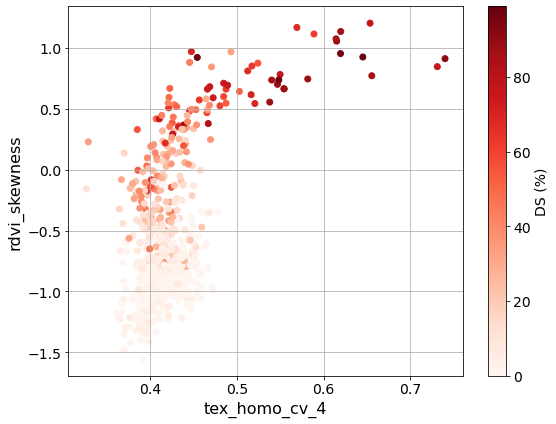

In [8]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(Data['tex_homo_cv_4'], Data['rdvi_skewness'], c=Data['CLS_score']*100, cmap='Reds')
plt.xlabel('tex_homo_cv_4', fontsize=16)
plt.ylabel('rdvi_skewness', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('DS (%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)  # Increase the font size of the colorbar
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
#plt.savefig('figures/feature_relation.png')

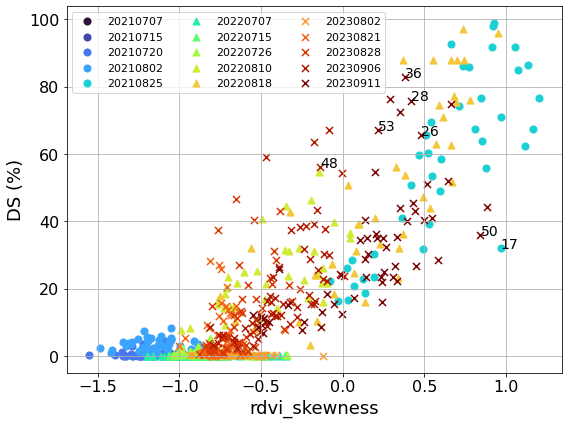

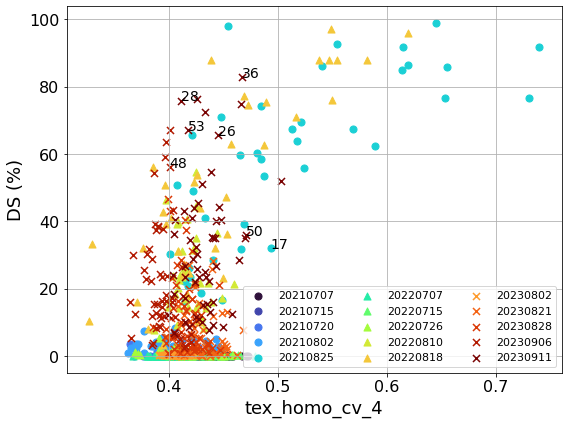

In [10]:
def plot_feature_scatter(Data,to_plot_feat, flight_plot,  plot_number=None, to_plot_flight = None):
    
    # Convert the flight_plot dictionary to a DataFrame
    flight_plot_df = pd.DataFrame(flight_plot)

    # Extract the 'Flight' column
    flight_column = Data['Flight']
    plot_column = Data['Plot']

    # Get unique flight numbers
    unique_flights = np.sort(flight_column.unique())

    # Define a color map to assign a unique color to each flight
    color_map = plt.get_cmap('turbo', len(unique_flights))
    #color_map = plt.get_cmap('Paired', len(unique_flights))
    
    # Plot all flights if to_plot_flight is None
    if to_plot_flight is None:
        to_plot_flight = unique_flights

    # Create scatter plots for each feature, distinguishing flights by color
    for feature_column in to_plot_feat:
        plt.figure(figsize=(8, 6))

        for i,flight_number in enumerate(unique_flights):
            mask = flight_column == flight_number
            if (flight_number in to_plot_flight):
                # Check the starting characters of the flight number and change the marker accordingly
                if str(flight_number).startswith('2021'):
                    marker = 'o'  # circle
                elif str(flight_number).startswith('2022'):
                    marker = '^'  # triangle
                elif str(flight_number).startswith('2023'):
                    marker = 'x'  # x
                plt.scatter(Data.loc[mask, feature_column], Data.loc[mask, 'CLS_score']*100, alpha=1, 
                            label=f'{flight_number}', color=color_map(i/len(unique_flights)), marker=marker, s=50)
                
                plot_mask = flight_plot_df.isin({'Flight': [flight_number], 'Plot': plot_column[mask].values}).all(axis=1)
                for plot_num in flight_plot_df[plot_mask]['Plot']:
                    plt.text(Data[feature_column][mask][plot_column[mask] == plot_num], 
                             Data['CLS_score'][mask][plot_column[mask] == plot_num]*100, f'{plot_num}', fontsize=14)

        if plot_number:
            # Add plot numbers as text labels
            for i,plot_num in enumerate(plot_column):
                plt.text(Data[feature_column].iloc[i], Data['CLS_score'].iloc[i]*100, f'{plot_num}', fontsize=14, ha='right')      

        plt.xlabel(feature_column, fontsize=18)
        plt.ylabel('DS (%)', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=16)
        #plt.title(f'Scatter Plot of {feature_column} vs. CLS_score', fontsize=16)
        plt.legend(fontsize=11, ncol=3)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'figures/scatter_{feature_column}.png')
        plt.show()

# Write the feature names and the flight_plot to mark
feat_rf = ['rdvi_skewness', 'tex_homo_cv_4'] 
flight_plot={'Flight':[20210825, 20230911, 20230911,20230911,20230911,20230911,20230906],
             'Plot':[17,26,28,36,50,53,48]}
plot_feature_scatter(Data, feat_rf, flight_plot, plot_number=False)